In [1]:
%matplotlib inline

In [2]:
# Pulled from http://pandas.pydata.org/pandas-docs/stable/10min.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = pd.Series([1, 2, 3, np.nan, 6, 8])
s

0     1
1     2
2     3
3   NaN
4     6
5     8
dtype: float64

In [4]:
dates = pd.date_range('20150101', periods=6)
dates

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2015-01-01,0.541523,0.656754,1.041148,0.254704
2015-01-02,-2.224931,0.721194,-1.149152,0.972962
2015-01-03,2.076759,0.924576,-0.288573,1.823519
2015-01-04,1.112093,1.455923,0.349503,1.662071
2015-01-05,-0.929084,0.258309,-0.785479,0.754340
2015-01-06,-0.709599,0.377769,0.510650,0.078269


In [6]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.022207,0.732421,-0.053651,0.924311
std,1.559296,0.428204,0.833119,0.713902
min,-2.224931,0.258309,-1.149152,0.078269
25%,-0.874213,0.447515,-0.661252,0.379613
50%,-0.084038,0.688974,0.030465,0.863651
75%,0.969451,0.873731,0.470363,1.489794
max,2.076759,1.455923,1.041148,1.823519


In [7]:
df.T

,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00
A,0.541523,-2.224931,2.076759,1.112093,-0.929084,-0.709599
B,0.656754,0.721194,0.924576,1.455923,0.258309,0.377769
C,1.041148,-1.149152,-0.288573,0.349503,-0.785479,0.510650
D,0.254704,0.972962,1.823519,1.662071,0.754340,0.078269


In [8]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2015-01-01,0.254704,1.041148,0.656754,0.541523
2015-01-02,0.972962,-1.149152,0.721194,-2.224931
2015-01-03,1.823519,-0.288573,0.924576,2.076759
2015-01-04,1.662071,0.349503,1.455923,1.112093
2015-01-05,0.754340,-0.785479,0.258309,-0.929084
2015-01-06,0.078269,0.510650,0.377769,-0.709599


In [9]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2015-01-04,1.112093,1.455923,0.349503,1.662071
2015-01-03,2.076759,0.924576,-0.288573,1.823519
2015-01-02,-2.224931,0.721194,-1.149152,0.972962
2015-01-01,0.541523,0.656754,1.041148,0.254704
2015-01-06,-0.709599,0.377769,0.510650,0.078269
2015-01-05,-0.929084,0.258309,-0.785479,0.754340


In [10]:
df.loc[:,['A','D']]

,A,D
2015-01-01,0.541523,0.254704
2015-01-02,-2.224931,0.972962
2015-01-03,2.076759,1.823519
2015-01-04,1.112093,1.662071
2015-01-05,-0.929084,0.754340
2015-01-06,-0.709599,0.078269


In [11]:
df.at[dates[3], 'A']

1.1120932992242714

In [12]:
df[df>0]

,A,B,C,D
2015-01-01,0.541523,0.656754,1.041148,0.254704
2015-01-02,NaN,0.721194,NaN,0.972962
2015-01-03,2.076759,0.924576,NaN,1.823519
2015-01-04,1.112093,1.455923,0.349503,1.662071
2015-01-05,NaN,0.258309,NaN,0.754340
2015-01-06,NaN,0.377769,0.510650,0.078269


In [13]:
df['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df

,A,B,C,D,E
2015-01-01,0.541523,0.656754,1.041148,0.254704,one
2015-01-02,-2.224931,0.721194,-1.149152,0.972962,one
2015-01-03,2.076759,0.924576,-0.288573,1.823519,two
2015-01-04,1.112093,1.455923,0.349503,1.662071,three
2015-01-05,-0.929084,0.258309,-0.785479,0.754340,four
2015-01-06,-0.709599,0.377769,0.510650,0.078269,three


In [14]:
df[df['E'].isin(['two','four'])]

,A,B,C,D,E
2015-01-03,2.076759,0.924576,-0.288573,1.823519,two
2015-01-05,-0.929084,0.258309,-0.785479,0.754340,four


In [15]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20150102', periods=6))
s1

2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
2015-01-06    5
2015-01-07    6
Freq: D, dtype: int64

In [16]:
df['F'] = s1
df.at[dates[0], 'A'] = 0
df.iat[0,1] = 0
df.iat[0,2] = np.random.rand()
df.loc[:, 'D'] = np.array([5] * len(df))

In [17]:
df

,A,B,C,D,E,F
2015-01-01,0.000000,0.000000,0.656389,5,one,NaN
2015-01-02,-2.224931,0.721194,-1.149152,5,one,1
2015-01-03,2.076759,0.924576,-0.288573,5,two,2
2015-01-04,1.112093,1.455923,0.349503,5,three,3
2015-01-05,-0.929084,0.258309,-0.785479,5,four,4
2015-01-06,-0.709599,0.377769,0.510650,5,three,5


In [18]:
df.dropna(how='any')

,A,B,C,D,E,F
2015-01-02,-2.224931,0.721194,-1.149152,5,one,1
2015-01-03,2.076759,0.924576,-0.288573,5,two,2
2015-01-04,1.112093,1.455923,0.349503,5,three,3
2015-01-05,-0.929084,0.258309,-0.785479,5,four,4
2015-01-06,-0.709599,0.377769,0.510650,5,three,5


In [19]:
df.fillna(value=5)

,A,B,C,D,E,F
2015-01-01,0.000000,0.000000,0.656389,5,one,5
2015-01-02,-2.224931,0.721194,-1.149152,5,one,1
2015-01-03,2.076759,0.924576,-0.288573,5,two,2
2015-01-04,1.112093,1.455923,0.349503,5,three,3
2015-01-05,-0.929084,0.258309,-0.785479,5,four,4
2015-01-06,-0.709599,0.377769,0.510650,5,three,5


In [20]:
df.mean()

A   -0.112460
B    0.622962
C   -0.117777
D    5.000000
F    3.000000
dtype: float64

In [21]:
df.mean(1)

2015-01-01    1.414097
2015-01-02    0.669422
2015-01-03    1.942552
2015-01-04    2.183504
2015-01-05    1.508749
2015-01-06    2.035764
Freq: D, dtype: float64

In [22]:
df.sum(1)

2015-01-01     5.656389
2015-01-02     3.347111
2015-01-03     9.712762
2015-01-04    10.917520
2015-01-05     7.543746
2015-01-06    10.178820
Freq: D, dtype: float64

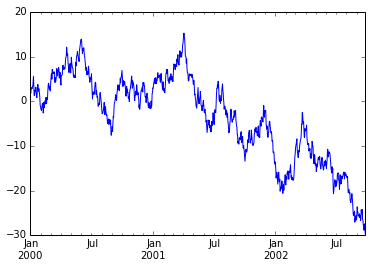

In [23]:
# Plotting
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

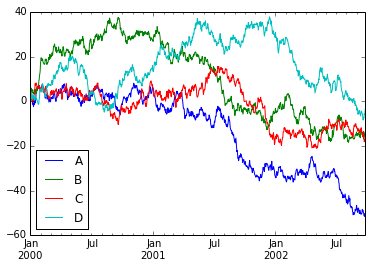

In [29]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [30]:
# CSV!
df.to_csv('foo.csv')

In [31]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.840654,0.887184,0.904223,0.258760
1,2000-01-02,0.703931,2.639105,-0.088299,0.674169
2,2000-01-03,1.407873,3.710416,0.981541,1.867817
3,2000-01-04,1.072191,5.902792,1.090751,2.038106
4,2000-01-05,0.818028,4.631318,1.524670,3.116843
5,2000-01-06,0.727893,5.211073,1.387693,0.826371
6,2000-01-07,-1.283300,4.006943,1.374726,0.908084
7,2000-01-08,0.108645,3.697152,-0.384527,1.252919
8,2000-01-09,-1.277069,3.506524,0.328323,2.844762
9,2000-01-10,-2.424930,3.658181,0.475725,2.262154
